In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sn
import math

**Question** 
On a specific day, 20 customers purchased items from FTO. It is observed that 10% of their customers return items purchased by them. Calculate:
1. P(exactly 5 customers will return the items).
2. P(maximum 5 customers will return the items).
3. Probabillity that more than 5 customers will return the items
4. Average and variance of the returns

In [ ]:
# This plots a graph of the binomial distribution for items returned from 1 to 20
pmf_df = pd.DataFrame({'success': range(0, 21),
                       'pmf': list(stats.binom.pmf(range(0,21), 20, 0.1))})

plt.bar(pmf_df.success, pmf_df.pmf)
plt.xticks(list(range(0, 21)))
plt.ylabel('pmf')
plt.xlabel('Number of items returned')
plt.show()

In [ ]:
# Answer to 2.
stats.binom.cdf(5, 20, 0.1)

In [ ]:
#Answer to 3.
1 - stats.binom.cdf(5, 20, 0.1)

In [ ]:
mean, var = stats.binom.stats(20, 0.1)
mean

**Poisson Distribution**

**Question**
The number of calls arriving at a call center follows a Poisson distribution at 10 calls per hour. Calculate:
1. P(number of calls will be maximum 5)
2. P(Number of calls over a 3-houred period will exceed 30)

In [ ]:
# Answer to first question
# We use stats.poisson.cdf() where 1st parameter is Number of events 
# and 2nd parameter is average number of events
stats.poisson.cdf(5, 10)

In [ ]:
# Answer to second problem
# Since the average calls per hour is 10(lambda = 10) the mean of calls over 3 hours is lambda*t = 30
1 - stats.poisson.cdf(30, 30)

In [ ]:
# Now we visualize the Pisson Distribution, we plot PMF for all possible no. of calls ranging from 0 to 30
pmf_df = pd.DataFrame({'success': range(0, 30),
                       'pmf': list(stats.poisson.pmf(range(0,30), 10))})

plt.bar(pmf_df.success, pmf_df.pmf)
plt.xticks(list(range(0, 30)), rotation=90)
plt.ylabel('pmf')
plt.xlabel('Number of calls received')
plt.title('Poisson Distribution (λ = 10)')
plt.show()

**Exponential Distribution**

**Question**
The time-to-failure of an avionic system follows an exponential distribution with a mean time between failures(MTBF) of 1000 hours. Calculate
1. P(System will fail before 1000 hours)
2. P(It will not fail up to 2000 hours)
3. The time by which 10% of the system will fail(i.e. calculate P(10) life).

In [ ]:
# Answer to 1, we use stats.expon.cdf() that takes the number of hours and mean and scale of 
# exponential distribution
stats.expon.cdf(1000, loc=1/1000, scale=1000)

# Answer to second question
1 - stats.expon.cdf(2000, loc=1/1000, scale=1000)

# Answer to 3 we use ppf (percent point function) which is the inverse of CDF
stats.expon.ppf(0.1, loc=1/1000, scale=1000)

In [ ]:
# Now we visualize the exponential distribution by using the PDF function against different time-to-failure hours

pdf_df = pd.DataFrame({'success': range(0, 5000, 100),
                       'pdf': list(stats.expon.pdf(range(0, 5000, 100), loc=0, scale=1000))})
plt.figure(figsize=(10, 4))
plt.bar(pdf_df.success, pdf_df.pdf)
plt.ylabel('pdf')
plt.xlabel('Time to Failure')
plt.title('Exponential Distritbution')
plt.xticks(list(range(0, 5000, 100)), rotation=90)

plt.show()

**Normal Distribution**

In [37]:
import warnings

beml = pd.read_csv('BEML.csv')
beml.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [38]:
glaxo = pd.read_csv('GLAXO.csv')
glaxo.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [39]:
beml = beml[['Date', 'Close']]
beml = beml.set_index(pd.DatetimeIndex(beml['Date']))
beml.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [40]:
glaxo = glaxo[['Date', 'Close']]
glaxo = glaxo.set_index(pd.DatetimeIndex(glaxo['Date']))
glaxo.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


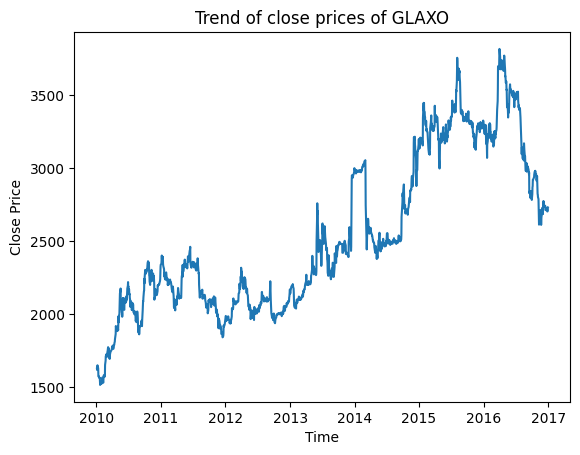

In [41]:
plt.plot(glaxo.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Trend of close prices of GLAXO')
plt.show()

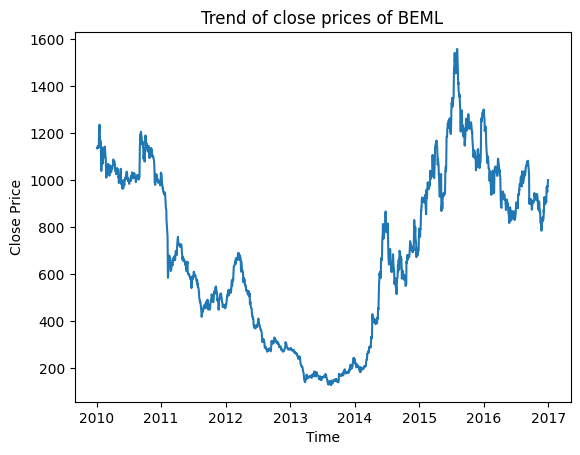

In [42]:
plt.plot(beml.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Trend of close prices of BEML')
plt.show()

**Questions in the mind of the investor**
1. What is the expected daily rate of return of these stocks?
2. Which stocks have higher risk or volatility as far as daily returns are concerned?
3. What is the expected range of return for 95% confidence interval?
4. Which stock has higher probability of making a daily return of 2% or more?
5. Which stock has higher probability of making a loss(risk) of 2% or more?

To answer the above questions, we must find out the behaviour of daily returns on these stocks. The gain can be calculated as a percentage change in close price, from the previous day's close price.

gain = $\frac{ClosePrice_t - ClosePrice_{t-1}}{ClosePrice_{t-1}}$


In [43]:
glaxo['gain'] = glaxo.Close.pct_change(periods=1)
beml['gain'] = beml.Close.pct_change(periods=1)
glaxo = glaxo.dropna()
beml = beml.dropna()
glaxo.head()


,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


In [44]:
beml.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162


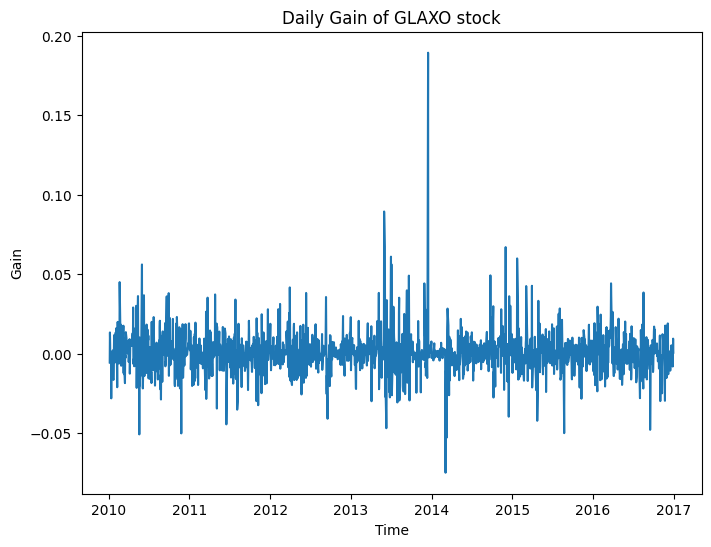

In [45]:
# Plotting gain against time for GLAXO
plt.figure(figsize=(8, 6))
plt.plot(glaxo.index, glaxo.gain)
plt.xlabel('Time')
plt.ylabel('Gain')
plt.title('Daily Gain of GLAXO stock')
plt.show()

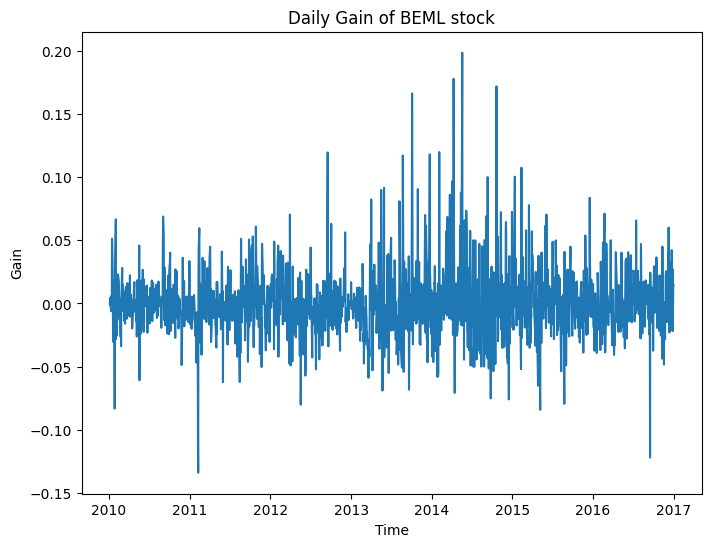

In [46]:
# Plotting gain against time for BEML
plt.figure(figsize=(8, 6))
plt.plot(beml.index, beml.gain)
plt.xlabel('Time')
plt.ylabel('Gain')
plt.title('Daily Gain of BEML stock')
plt.show()

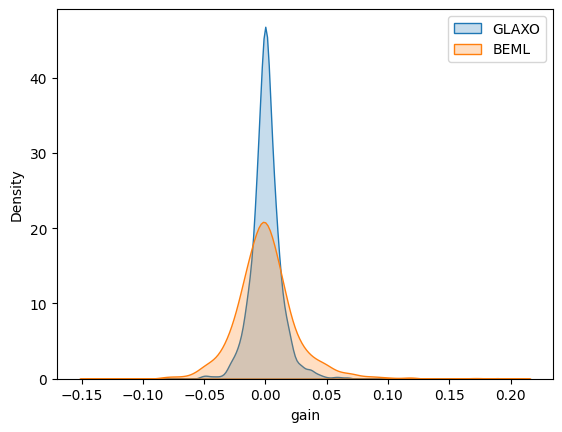

In [47]:
sn.kdeplot(glaxo.gain, label='GLAXO', fill=True)
sn.kdeplot(beml.gain, label='BEML', fill=True)
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

In [48]:
print("Daily Gain of Glaxo")
print("----------------------")
print("Mean: ", round(glaxo.gain.mean(), 4))
print("Standard Deviation: ", round(glaxo.gain.std(), 4))

Daily Gain of Glaxo
----------------------
Mean:  0.0004
Standard Deviation:  0.0134


In [49]:
print("Daily Gain of BEML")
print("----------------------")
print("Mean: ", round(beml.gain.mean(), 4))
print("Standard Deviation: ", round(beml.gain.std(), 4))

Daily Gain of BEML
----------------------
Mean:  0.0003
Standard Deviation:  0.0264


In [50]:
beml.gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

**Confidence Interval** :- To find what is the expected range of return for 95% confidence interval, we need to calculate the values of gain for two standard deviations away from mean on both sides of the distribution, that is 
$\mu \pm 2\sigma$

In [52]:
glaxo_ci = stats.norm.interval(0.95, loc=glaxo.gain.mean(), scale=glaxo.gain.std())
print("Gain at 95% confidence interval for GLAXO is: ", np.round(glaxo_ci, 4))

Gain at 95% confidence interval is:  [-0.0258  0.0266]


In [53]:
beml_ci = stats.norm.interval(0.95, loc=beml.gain.mean(), scale=beml.gain.std())
print("Gain at 95% confidence interval for BEML is: ", np.round(beml_ci, 4))

Gain at 95% confidence interval for BEML is:  [-0.0515  0.0521]


**Cumulative Probability Distribution** : To calculate the probability of gain higher than 2% or more, we need to find out what is the sum of all probabilities that gain can take values more than 0.02(i.e., 2%). Cumulative distribution function F(a) is the area under the probability density function up to X = a.

In [55]:
print("Probability of making 2% loss or higher in GLAXO: ")
stats.norm.cdf(-0.02, loc=glaxo.gain.mean(), scale=glaxo.gain.std())

Probability of making 2% loss or higher in GLAXO: 


np.float64(0.06352488667177401)

In [56]:
print("Probability of making 2% loss or higher in BEML: ")
stats.norm.cdf(-0.02, loc=beml.gain.mean(), scale=beml.gain.std())

Probability of making 2% loss or higher in BEML: 


np.float64(0.22155987503755292)

From here we can see that BEML has 22.1% probability, whereas Glaxo has only 6.35% probability of making a loss of 2% or higher.

In [57]:
print("Probability of making 2% gain or higher in BEML: ")
1 - stats.norm.cdf(0.02, loc=beml.gain.mean(), scale=beml.gain.std())

Probability of making 2% gain or higher in BEML: 


np.float64(0.22769829484075355)

In [58]:
print("Probability of making 2% gain or higher in Glaxo: ")
1 - stats.norm.cdf(0.02, loc=glaxo.gain.mean(), scale=glaxo.gain.std())

Probability of making 2% gain or higher in Glaxo: 


np.float64(0.07104511457618568)

So the probability of making a gain of 2% or more for Glaxo is 7.1%, whereas it is 22.76% for BEML

**Exercises Solution** :- 

Question 1

In [66]:
# (a)
print(1 - stats.poisson.cdf(30, 25))
# (b)
print(1 - stats.binom.cdf(1, 25, 0.05))

0.1366911308473363
0.3576241464547001


Question 2

In [68]:
# (a)
print(1 - stats.binom.cdf(2, 8, 0.42))
# (b)
print(stats.binom.pmf(4, 8, 0.42))

0.7249765375851261
0.24649446736051217


Question 3

In [72]:
# (a)
print(stats.expon.cdf(85, scale=85))
# (b)
print(1 - stats.expon.cdf(150, scale=85))

0.6321205588285577
0.1712371429447882


Question 4

In [73]:
# (a)
print(1 - stats.norm.cdf(50, 38, 5))
# (b)
print(stats.norm.cdf(10, 38, 5))
# (c)
print(stats.norm.cdf(60, 38, 5) - stats.norm.cdf(30, 38, 5))

0.008197535924596155
1.0717590258310887e-08
0.9451952957565343


 Question 5

In [77]:
def z_test(pop_mean, pop_std, sample_mean, n):
    z_score = (sample_mean - pop_mean) / (pop_std / math.sqrt(n))
    return z_score, stats.norm.cdf(z_score)

print(z_test(5000, 1.30, 4998.1, 60))

(-11.321028242757974, np.float64(5.162682749978096e-30))


Here the p value is much lesser than a = 0.05, so we reject the Hypothesis

Question 6

In [79]:
p0 = 0.18        # Claimed proportion
n = 100          # Sample size
x = 22           # Number of defectives
phat = x / n     # Sample proportion
alpha = 0.05

# Z-statistic
z = (phat - p0) / np.sqrt(p0 * (1 - p0) / n)

# p-value for right-tailed test
p_value = 1 - stats.norm.cdf(z)

# Decision
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Output
print(f"Sample proportion: {phat:.2f}")
print(f"Z-score: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {result}")

Sample proportion: 0.22
Z-score: 1.0412
P-value: 0.1489
Decision: Fail to reject the null hypothesis


Question 7

In [ ]:
x1 = 450  # mean of ABC
s1 = 82   # std dev of ABC
n1 = 100  # sample size of ABC

x2 = 368  # mean of Competitor
s2 = 78   # std dev of Competitor
n2 = 100  # sample size of Competitor

numerator = (x1 - x2) - claimed_diff
denominator = math.sqrt((s1**2)/n1 + (s2**2)/n2)
z = numerator / denominator
